# Table of contents
1. [Team members](#team)
2. [Libraries](#libraries)
3. [Exploring data](#exploring)
4. [Preprocessing data](#preprocessing)
5. [Questions](#questions)
    - [Question 1](#question-1)
    - [Question 2](#question-2)
    - [Question 3](#question-3)
    - [Question 4](#question-4)
    - [Question 5](#question-5)
6. [Modelling](#modelling)
    - [Data preparation](#modelling_preparation)
    - [Models: ](#models)
        - [Model 1 (change the number to the name of model. Ex: 1 -> Logistic Regression)](#model1)
    - [Evaluation](#evaluation)
7. [Reflection](#reflection)
    - [Difficulties during the project](#difficulties)
    - [Useful things learned](#useful)
    - [Plans to improve if have more time](#plans)
8. [References](#references)

<h1 id = "team">1. Team members</h1>
<style>
  table {
    margin: auto;
    width: 45%; /* Adjust the width as needed */
  }
  td {
    text-align: center;
    padding: 8px; /* Adding padding for better readability */
  }
  th
  {
    text-align: center;
  }
</style>

<table>
    <tr>
        <th> ID </th>
        <th> NAME </th>
    </tr>
    <tr>
        <td>22127148</td>
        <td>Dương Nhật Huy</td>
    </tr>
    <tr>
        <td>22127224</td>
        <td>Trương Thuận Kiệt</td>
    </tr>
    <tr>
        <td>22127257</td>
        <td>Phạm Minh Mẫn</td>
    </tr>
    <tr>
        <td>22127492</td>
        <td>Hồ Đăng Phúc</td>
    </tr>

<h1 id = "libraries"> 2. Libraries </h1>

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

<h1 id = "exploring"> 3. Exploring data</h1>

In [158]:
raw_data  = pd.read_csv('./Data/full_data.csv')

In [159]:
raw_data.head()

,Title,CriticScore,UserScore,Link,PlatformReleased,Cast,Director,Genre,Rating,Runtime,Studio,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Formated name,Metascore,Userscore
0,L.A. Confidential,99%,94%,https://www.rottentomatoes.com/m/la_confidential,Cinema,"Kevin Spacey, Russell Crowe, Guy Pearce, James...",Curtis Hanson,"Crime, Drama",R,2h 16m,Warner Home Vídeo,"Sep 19, 1997","$35,000,000","$64,604,977","$126,204,977",l.a.confidential,91,8.6
1,The Godfather,97%,98%,https://www.rottentomatoes.com/m/the_godfather,Cinema,"Marlon Brando, Al Pacino, James Caan, Richard ...",Francis Ford Coppola,"Crime, Drama",R,2h 57m,Paramount Pictures,"Mar 15, 1972","$7,000,000","$136,479,994","$270,007,394",thegodfather,100,9.3
2,Casablanca,99%,95%,https://www.rottentomatoes.com/m/1003707-casab...,Cinema,"Humphrey Bogart, Ingrid Bergman, Paul Henreid,...",Michael Curtiz,Drama,PG,1h 42m,Warner Bros. Pictures,"Jan 23, 1943","$1,039,000","$10,462,500","$10,567,179",casablanca,100,8.7
3,Parasite,99%,90%,https://www.rottentomatoes.com/m/parasite_2019,Cinema,"Song Kang-ho, Lee Sun-kyun, Jo Yeo-jeong, Choi...",Bong Joon Ho,"Comedy, Mystery & Thriller, Drama",R,2h 12m,Neon,"May 30, 2019","$11,800,000","$53,369,745","$253,267,858",parasite,97,8.9
4,Top Gun: Maverick,96%,99%,https://www.rottentomatoes.com/m/top_gun_maverick,Cinema,"Tom Cruise, Miles Teller, Jennifer Connelly, J...",Joseph Kosinski,"Action, Adventure",PG-13,2h 11m,Paramount Pictures,"May 20, 2022","$170,000,000","$718,732,821","$1,464,400,233",topgun:maverick,78,8.4


### Number of rows and columns

In [160]:
shape = raw_data.shape  
shape

(5106, 18)

### The meaning of each line

- Each line of the dataset is a record of a movie, and all records include various features of the movie like Name, Genres, Cast, Budget, Revenue, Runtime, etc

### Duplicated rows

In [161]:
num_duplicates = raw_data.duplicated().sum()
num_duplicates

0

Phew, luckily no duplicated rows

### The meaning of each column

### Data type of each column

In [162]:
dtype = raw_data.dtypes
dtype

Title                object
CriticScore          object
UserScore            object
Link                 object
PlatformReleased     object
Cast                 object
Director             object
Genre                object
Rating               object
Runtime              object
Studio               object
Release Date         object
Production Budget    object
Domestic Gross       object
Worldwide Gross      object
Formated name        object
Metascore            object
Userscore            object
dtype: object

As can be seen that, all types of each colum are currently objects. Therefore, those needs re-typing

### Data retyping

+ Title, Link, PlatformReleased, Studio : These are meant to be string, so there no need to convert it

+ CriticScore and UserScore are numbers, therfore we convert them into numerical datatype

Note : All numerical value are kept in float not interger because numpy require float to store nan

In [163]:
#Remove '%' notation and keep the score
def get_score_percentage(score_str):
    if pd.isna(score_str) or score_str == 'nan' or score_str == 'NaN':
        return np.nan
    elif re.match(r'^\d{1,3}%$', score_str):
            return float(score_str[:-1])
    return np.nan

raw_data['CriticScore'] = raw_data['CriticScore'].apply(get_score_percentage)
raw_data['UserScore'] = raw_data['UserScore'].apply(get_score_percentage)

+ Convert MetaScore and UserScore into Numerical datatype too

In [164]:
#Check if a string is a valid number because there are invalid value in Metascore and Userscore
def get_score(score_str):
    if pd.isna(score_str) or score_str == 'nan' or score_str == 'NaN':
        return np.nan
    elif re.match(r'^-?\d+(\.\d+)?$', score_str):
        return float(score_str)
    return np.nan
    
raw_data['Metascore'] = raw_data['Metascore'].apply(get_score)
raw_data['Userscore'] = raw_data['Userscore'].apply(get_score)


+ Because a movie may have many Actors, many Director and different Gern, we split them and store into a list

In [165]:
#Split string by comma seperated
def split_item(string):
    if pd.isna(string) or string == 'nan' or string == 'NaN':
        return pd.NA
    else:
        return string.split(', ')
    
raw_data['Cast'] = raw_data['Cast'].apply(split_item)
raw_data['Genre'] = raw_data['Genre'].apply(split_item)
raw_data['Director'] = raw_data['Director'].apply(split_item)

+ There are 10 different ratings, so we convert them into Pandas Categorial

In [166]:
raw_data['Rating'] = raw_data['Rating'].astype('category')

+ We convert Runtime into dictionary consists of hours and minutes for easier operating

In [167]:


# Collect runtime information and convert it into dictionary
def get_runtime(runtime_str):
    if pd.isna(runtime_str) or runtime_str == 'nan' or runtime_str == 'NaN':
        return pd.NA
    else:
        runtime = runtime_str.split()

        if 'h' in runtime[0]:   
            hours = int(runtime[0].split('h')[0])
            minutes = int(runtime[1].split('m')[0])
        else:
            hours = 0
            minutes = int(runtime[0].split('m')[0])
        return {'hours' : hours, 'minutes': minutes}

raw_data['Runtime'] = raw_data['Runtime'].apply(get_runtime)


+ We convert release date into Pandas Datetime

In [168]:
month_dict = {'Jan' : 1, 'Feb' : 2, 'Mar' : 3, 'Apr' : 4, 'May' : 5, 'Jun' : 6, 'Jul' : 7, 'Aug' : 8, 'Sep' : 9, 'Oct' : 10, 'Nov' : 11, 'Dec' : 12}

# Collect date string and store it into datetime format
def parse_datetime(date_str):
    if pd.isna(date_str) or date_str == 'nan' or date_str == 'NaN' or date_str == 'Unknown':
        return pd.NaT
    else:
        date = date_str.replace(',','').split()
        if len(date) == 1:
            year = int(date[0])
            return pd.to_datetime(year, format ='%Y')
        elif len(date) == 2:
            month = month_dict[date[0]]
            year = int(date[1])
            day = 1
            return pd.to_datetime(f'{year}-{month}-{day}', format='%Y-%m-%d')
        else:
            month = month_dict[date[0]]
            day = int(date[1])
            year = int(date[2])
            return pd.to_datetime(f'{year}-{month}-{day}', format='%Y-%m-%d')

raw_data['Release Date'] = raw_data['Release Date'].apply(parse_datetime)
    

+ Finally, convert Budgets and Grossess into numerical datatype and we are done

In [169]:
# Replace $ notation, replace comma and get the value
def parse_money(money_str):
    if pd.isna(money_str) or money_str == 'nan' or money_str == 'NaN':
        return np.nan
    else:
        money_str = money_str.replace('$','').replace(',','')
        return float(money_str)

raw_data['Production Budget'] = raw_data['Production Budget'].apply(parse_money)         
raw_data['Domestic Gross'] = raw_data['Domestic Gross'].apply(parse_money)
raw_data['Worldwide Gross'] = raw_data['Worldwide Gross'].apply(parse_money)

+ Rename UserScore, Userscrore columns and drop Formated name columns because we dont use it

In [170]:
raw_data.rename(columns={'UserScore' : 'Tomatoes UserScore', 'Userscore' : 'Meta UserScore', 'CriticScore' : 'Tomatoes CriticScore', 'MetaScore': 'Meta CriticScore'}, inplace=True)

raw_data = raw_data.drop('Formated name', axis=1)

In [171]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Title                 5106 non-null   object        
 1   Tomatoes CriticScore  4129 non-null   float64       
 2   Tomatoes UserScore    4523 non-null   float64       
 3   Link                  5106 non-null   object        
 4   PlatformReleased      5106 non-null   object        
 5   Cast                  5074 non-null   object        
 6   Director              5071 non-null   object        
 7   Genre                 5060 non-null   object        
 8   Rating                4015 non-null   category      
 9   Runtime               5036 non-null   object        
 10  Studio                5059 non-null   object        
 11  Release Date          5031 non-null   datetime64[ns]
 12  Production Budget     5106 non-null   float64       
 13  Domestic Gross    

In [172]:
raw_data.head()

,Title,Tomatoes CriticScore,Tomatoes UserScore,Link,PlatformReleased,Cast,Director,Genre,Rating,Runtime,Studio,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Metascore,Meta UserScore
0,L.A. Confidential,99.0,94.0,https://www.rottentomatoes.com/m/la_confidential,Cinema,"[Kevin Spacey, Russell Crowe, Guy Pearce, Jame...",[Curtis Hanson],"[Crime, Drama]",R,"{'hours': 2, 'minutes': 16}",Warner Home Vídeo,1997-09-19,35000000.0,64604977.0,1.262050e+08,91.0,8.6
1,The Godfather,97.0,98.0,https://www.rottentomatoes.com/m/the_godfather,Cinema,"[Marlon Brando, Al Pacino, James Caan, Richard...",[Francis Ford Coppola],"[Crime, Drama]",R,"{'hours': 2, 'minutes': 57}",Paramount Pictures,1972-03-15,7000000.0,136479994.0,2.700074e+08,100.0,9.3
2,Casablanca,99.0,95.0,https://www.rottentomatoes.com/m/1003707-casab...,Cinema,"[Humphrey Bogart, Ingrid Bergman, Paul Henreid...",[Michael Curtiz],[Drama],PG,"{'hours': 1, 'minutes': 42}",Warner Bros. Pictures,1943-01-23,1039000.0,10462500.0,1.056718e+07,100.0,8.7
3,Parasite,99.0,90.0,https://www.rottentomatoes.com/m/parasite_2019,Cinema,"[Song Kang-ho, Lee Sun-kyun, Jo Yeo-jeong, Cho...",[Bong Joon Ho],"[Comedy, Mystery & Thriller, Drama]",R,"{'hours': 2, 'minutes': 12}",Neon,2019-05-30,11800000.0,53369745.0,2.532679e+08,97.0,8.9
4,Top Gun: Maverick,96.0,99.0,https://www.rottentomatoes.com/m/top_gun_maverick,Cinema,"[Tom Cruise, Miles Teller, Jennifer Connelly, ...",[Joseph Kosinski],"[Action, Adventure]",PG-13,"{'hours': 2, 'minutes': 11}",Paramount Pictures,2022-05-20,170000000.0,718732821.0,1.464400e+09,78.0,8.4


### Numerical column exploration

For columns with numeric data types, calculate:
- Percentage of missing values (From this and further calculation to propose a suitable approach to fill missing values of that column)
- The min
- The lower quartile
- The median
- The upper quartile
- The max
After calculating, give **visualization** to help get deeper understanding of data, from that graph/chart give some comments on the values' distribution of that column

#### RottenTomatoesCriticsScores

- Missing Ratio

In [173]:
print("Percentage of missing values: ", raw_data['Tomatoes CriticScore'].isna().mean()*100)

Percentage of missing values:  19.134351743047397


- Correlation among other numerical features

In [174]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import ttest_ind

mlb = MultiLabelBinarizer()
raw_data_tmp = raw_data.copy()
raw_data_tmp['Genre'] = raw_data_tmp['Genre'].fillna("")
genre_onehot = pd.DataFrame(mlb.fit_transform(raw_data_tmp['Genre']), columns=mlb.classes_, index=raw_data_tmp.index)
rating_onehot = pd.get_dummies(raw_data_tmp['Rating'], prefix='Rating')

raw_data_tmp = pd.concat([raw_data_tmp, genre_onehot, rating_onehot], axis=1)
raw_data_tmp = raw_data_tmp.drop(['Genre', 'Rating'], axis=1)

p_values = {}

for column in raw_data_tmp.columns:
    if column != 'Tomatoes CriticScore' and np.issubdtype(raw_data_tmp[column].dtype, np.number):
        missing_group = raw_data_tmp[raw_data_tmp['Tomatoes CriticScore'].isna()][column]
        non_missing_group = raw_data_tmp[~raw_data_tmp['Tomatoes CriticScore'].isna()][column]

        if len(missing_group) > 0 and len(non_missing_group) > 0:
            # Perform the t-test
            ttest_result = ttest_ind(missing_group, non_missing_group, nan_policy='omit')
            # Store the p-value in the dictionary
            p_values[column] = ttest_result.pvalue

# Convert the dictionary to a DataFrame for easier sorting
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Column', 'pvalue'])

# Sort the DataFrame by p-value
p_values_sorted = p_values_df.sort_values(by='pvalue', ascending=False)

# Print the sorted p-values
print(p_values_sorted)


                  Column        pvalue
8              Animation  7.757713e-01
9                  Anime  6.331468e-01
29                Sports  6.267054e-01
17               Foreign  6.267054e-01
15  Faith & Spirituality  6.267054e-01
19               Holiday  2.981110e-01
20                Horror  2.793797e-01
24               Musical  2.132383e-01
14                 Drama  1.974160e-01
25    Mystery & Thriller  1.968717e-01
12                 Crime  6.487590e-02
26                 Other  3.979249e-02
30                   War  3.676100e-02
31               Western  1.580981e-02
23                 Music  9.429270e-03
22                LGBTQ+  5.428654e-03
27               Romance  3.474896e-03
4              Metascore  2.863810e-03
18               History  2.695654e-03
5         Meta UserScore  6.894735e-04
10             Biography  5.453796e-05
13           Documentary  1.991623e-05
21         Kids & Family  4.126167e-06
28                Sci-Fi  1.083583e-06
16               Fantasy 

Most of p-values are > 0.05, suggesting that there is no significant difference between the groups with and without Tomatoes CriticScore <br>
It is likely that the missingness of Tomatoes CriticScore is **MCAR**

- Distribution of values

<Axes: title={'center': 'Tomatoes Critic Score'}, ylabel='Frequency'>

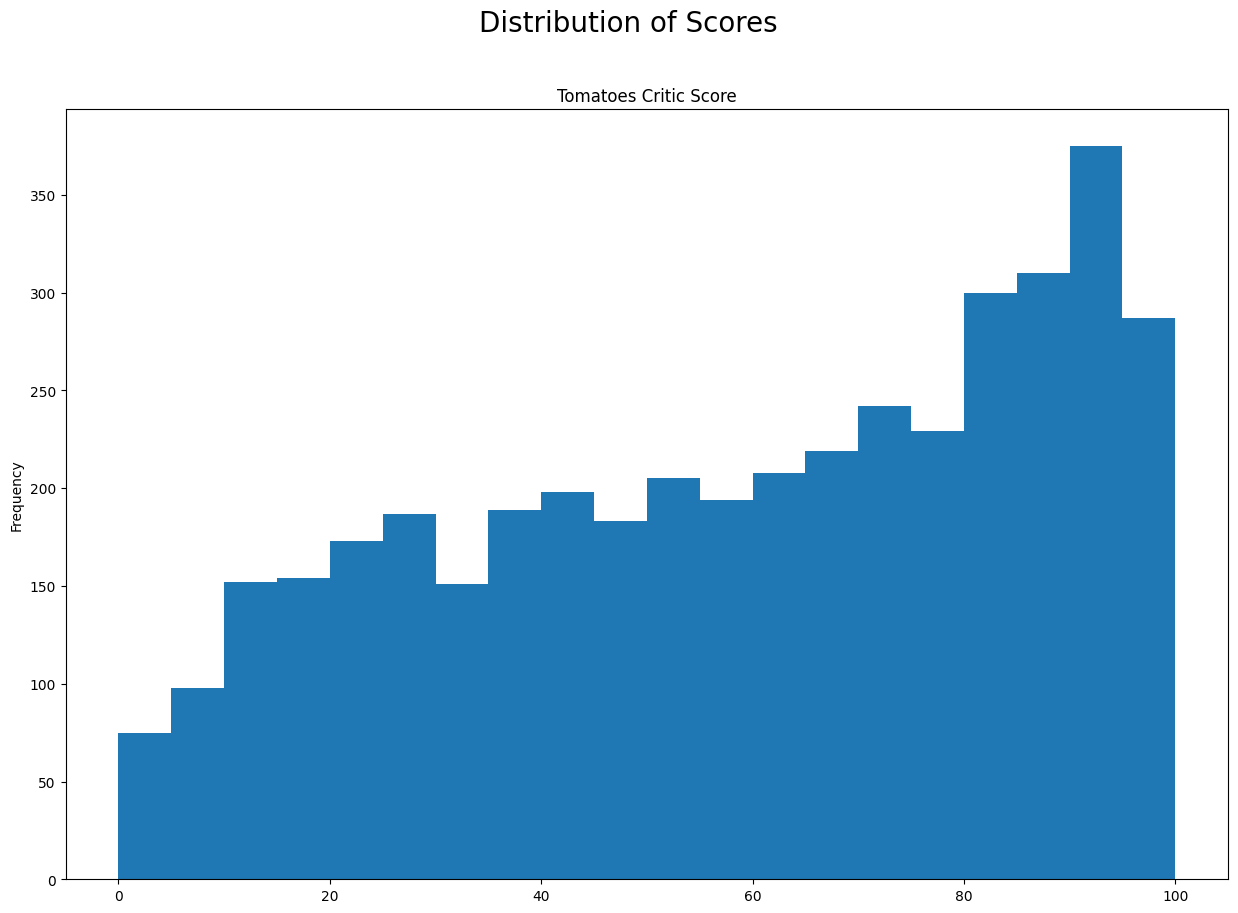

In [175]:
# Bar chart of scores
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig.suptitle('Distribution of Scores', fontsize=20)
raw_data['Tomatoes CriticScore'].plot(kind='hist', title='Tomatoes Critic Score', bins=20)


- Descriptive Statistics

In [176]:
# The mean of Critics_Score
from scipy.stats import skew, kurtosis, sem

# Load necessary data from raw_data['CriticScore'] 
scores = raw_data['Tomatoes CriticScore']

# Basic Measures
mean = scores.mean()                                # Arithmetic Mean
median = scores.median()                            # Median
mode = scores.mode().values[0] if not scores.mode().empty else None  # Mode (if exists)

# Quantiles
quartiles = scores.quantile([0.25, 0.5, 0.75]).values  # Quartiles (Q1, Q2 (median), Q3)
percentiles = scores.quantile([0.1, 0.9]).values       # 10th and 90th Percentiles
deciles = scores.quantile([i/10 for i in range(1, 10)]).values  # Deciles (10th to 90th percentiles)

# Range and IQR
data_range = [scores.min(), scores.max()]

# Standard Error of the Mean
standard_error = sem(scores)

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Quartiles: ", quartiles)
print("Percentiles: ", percentiles)
print("Deciles: ", deciles)
print("Range: ", data_range)


Mean:  58.367885686606925
Median:  62.0
Mode:  93.0
Quartiles:  [35. 62. 83.]
Percentiles:  [17. 93.]
Deciles:  [17. 29. 41. 51. 62. 71. 80. 87. 93.]
Range:  [0.0, 100.0]


**Mean (58.37):** On average, movies tend to receive a critic score around 58.37 out of 100.

**Median (62):** The median being higher than the mean suggests a positive skew in the distribution, meaning there are more movies with lower scores compared to higher scores.

**Mode (93):** The most frequent critic score is 93. This could be due to a few movies that received exceptionally high ratings.

**Quartiles:**

-   Q1 (35): 25% of the movies have a critic score of 35 or lower.
-   Q2 (Median, 62): 50% of the movies have a critic score of 62 or lower.
-   Q3 (83): 75% of the movies have a critic score of 83 or lower.
    
**Percentiles:**

- P10 (17): 10% of the movies have a critic score of 17 or lower.
- P90 (93): 90% of the movies have a critic score of 93 or lower.

**Deciles:** Movies tend to receive quite equal critic score from rotten tomatoes.

**Range (0-100):** This indicates that the critic scores range from 0 to 100, which is expected for a rating system.

**Overall, the summary statistics suggest a distribution that is skewed towards lower scores, with a few outliers on the higher end.**

### Categorical column exploration

For columns with non-numeric data types, you calculate:
- Percentage of missing values (From this and further calculation to propose a suitable approach to fill missing values of that column)
- Count no of unique values and no of element of each value (There is a column cast is quite difficult to explore, try to find a way)
-  Give **visualization** to help get deeper understanding of data, from that graph/chart or any collected information give some comments on the values' distribution of that column

In [177]:
# TODO

<h1 id = "preprocessing"> 4. Preprocessing data </h1>

<h1 id = "questions"> 5. Questions </h1>

<h2 id = question-1>5.1. Question 1</h2> 

<h2 id = question-2>5.2. Question 2</h2> 

<h2 id = question-3>5.3. Question 3</h2> 

<h2 id = question-4>5.4. Question 4</h2> 

<h2 id = question-5>5.5. Question 5</h2> 

<h1 id = "modelling">6. Modelling</h1>

<h2 id = "modelling_preparation">6.1. Data preparation</h2> 

<h2 id = "models">6.2. Models</h2> 

<h2 id = "models">6.2. Models</h2> 

<h3 id = "model1">6.2.1 Model 1</h3> 

<h2 id = >

<h2 id = "evaluation">6.3. Evaluation</h2> 

<h1 id = "reflection">7. Reflection</h1> 

<h2 id = "difficulties">7.1. Difficulties during the project</h2> 

<h2 id = "useful">7.2. Useful things learned</h2> 

<h2 id = "plans">7.3. Plans to improve if have more time</h2> 

<h1 id = "references">8. References</h1> 